# Case Study - Principal Component Analysis (PCA)

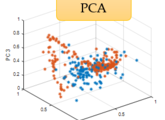

Dimensionality reduction is about getting rid of "uninformative information" while retaining the essential bits. With automatic data collection and feature generation techniques, easily data with numerous features can be obtained, but not all of them are useful as such. Model based feature reduction techniques, like PCA, takes data into consideration while doing the data reduction. It focuses on the notion of linear dependency. If the column space is small compared to the total number of features, then most of the features are linear combination of a few key features. Linearly dependent features are affecting the storage space and computational time because same information could have been represented with smaller number of features. PCA tries to get rid of these uninformative information from the dataset. 

PCA is widely used technique for data reduction. In this technique, mean of the data is removed. The goal of PCA is to find a new of dimensions (features / attributes/variables) that better describe the variability of the data. First component is selected which captures the much of the variability whereas the remanining components tries to capture the variability that is not captured by first component. Second component is orthogonal to the first one and subject to this restriction, it catures as much of the remaining variability. 

Characteristics of PCA : <br>
- It identifies strongest pattern in the data, hence can be used as pattern-finding technique
- Variability of data can be captured by a small fraction of total number of dimensions, resulting into much smaller dimensional data and works as a solution for reducing higher dimensional data into smaller one
- Noise in the data is many times weaker than the patterns, dimensionality reduction can eliminite much of the noise

Statistician's uses covariance matrix to capture the variability of a collection of multivariate data (i.e. data with multiple continuous attributes). Covariance is measure of how strongly the attributes vary together. 

The goal of PCA is to find a transformation of data that satisfies following properties:
- Each pair of new attributes that has 0 variance (distinct ones).
- The attributes are ordered based on amount of variance captured by them. 
- The first attribute (also known as first component) captures the maximum variability of the data as much as possible. 
- Each successive attibutes (components) captures the remaining variance as much as possible. 

Actually, PCA is carrying out the rotation of original coordinate axes to a new set of axes that are aligned with the variability in the data. The total variability of the data is preserved, but the new attributes are now uncorrelated. 

We will be trying out three different approaches to apply PCA :- 
- Approach 1 - Step by Step implementation of PCA
- Approach 2 - Using the matplotlib.mlab libraries PCA class
- Approach 3 - Using the sklearn.decomposition libraries PCA class

# 1. Problem defined

The main objective of PCA is to define a smaller subspace of features that represents our data well without much loss of information. That is , if we have d-dimensional dataset, how we can transform it into k-dimensional subset (where k < d) without much loss of information. How we can decide upon the value of k that defines a feature space that describes our well?

The eigenvalues and eigenvectors can be helpful here to identify this feature subspace. We can first obtain a covariance matrix, from which we can obtain the eigenvalues followed by eigenvectors, which are nothing but components(new features set). Eigenvalues associated with the eigenvectors tells about the magnitude of our new attributes i.e. eigenvectors. If the egienvalues are more or less similar,then already the feature space is well distributed. If some of eigenvalues are very large as comparted to the others, then we can focus on only those components, levaing behind the others as they have very less information or can have lot of noise in it. If the eigenvalues are around zero, then those components can also be dropped as they don't capture the variabilty of the data well. 

# 2. Approach 1 - Step by Step implementation of PCA

### Steps to be followed 

The PCA approach can be summarized as follows : <br>
- 1. Consider the n by d -dimensional data set where n is number of samples. Ignore the class labels.
- 2. Compute a vector representing the means of every dimension present in dataset. 
- 3. Compute the covariance matrix / scatter matrix for whole dataset. 
- 4. Compute the eigenvalues and their corresponding eigenvectors. 
- 5. Sort the eigenvectors based on descending magnitude of eigenvalues and select the first k eigenvectors to form d by k dimensional matrix W where each column represents an eigenvector.
- 6.Use this matrix W to transform the samples onto new subspace. 

### Lets try out these steps now. 

### Step 1 :- Prepare the dataset

Lets prepare a sample of size 50 using the three dimensional space with the help of Gaussian distribution. Consider that data samples needs to be created for two different class labels. Then we will ignore the class labels and merge the two samples into one sample only. 

Note - In realitiy you will be using your own dataset here. So no need to follow this particular step. The only condition is that all the dimensions should be continuous in nature. Otherwise appropriate transformations needs to be applied in this step.

In [1]:
import numpy as np 

In [2]:
#Prepare the required sample for class 1 
# random seed for consistency
np.random.seed(100) 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
sample1 = np.random.multivariate_normal(mu_vec1, cov_mat1, 50).T

assert sample1.shape == (3,50), "The matrix has not the dimensions 3x50"

print("******************")
print("Sample1")
print(sample1)
print("******************")

******************
Sample1
[[-1.74976547 -0.25243604  0.22117967  0.25500144 -0.58359505 -0.10441114
  -0.43813562  1.54160517  0.18451869  1.36155613  0.22239961  0.81645401
   1.18962227 -1.23243451  0.00731456 -1.73309562 -1.6135785  -0.54974619
   0.10886347  1.24946974 -0.88179839  0.01354855  0.61303888 -1.43219061
  -0.33177714 -0.55071441  0.58057334  0.68689007  0.7788224   0.02828363
  -1.70595201 -0.37690335 -0.07602347 -2.48715154 -2.97331547 -0.45017644
   0.31736798  0.09513944 -0.36546199  0.69339066 -1.54061602 -1.09717198
   0.94900478  0.75969312  1.29626259 -0.15726517  0.74705566 -0.64075992
   2.07479317  0.76318365]
 [ 0.3426804   0.98132079 -1.07004333 -0.45802699  0.81684707 -0.53128038
  -1.11831825 -0.25187914  0.9370822  -0.32623806 -1.443217    0.75044476
  -1.69061683 -0.54443916 -0.61293874 -0.9833101   1.47071387 -0.94004616
   0.50780959 -0.07961125  0.01863895 -1.6355294   0.73620521 -1.8411883
  -0.68921798  0.75045333 -1.10452309 -1.56668753  0.428232

In [3]:
#Prepare the required sample for class 2
# random seed for consistency
np.random.seed(123) 

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
sample2 = np.random.multivariate_normal(mu_vec2, cov_mat2, 50).T

assert sample2.shape == (3,50), "The matrix has not the dimensions 3x50"

print("******************")
print("Sample2")
print(sample2)
print("******************")

******************
Sample2
[[-8.56306033e-02 -5.06294714e-01 -1.42667924e+00  1.33259598e-01
   2.49138963e+00  5.65648724e-01  2.00405390e+00  2.49073203e+00
  -2.53880668e-01 -4.28680700e-01  7.44380629e-01  3.00122765e-01
   1.00284592e+00  1.28362732e+00  6.09100206e-01  9.88169506e-01
   1.97873601e+00 -3.87882102e-02  1.02968323e+00  2.75488618e+00
   2.27291286e-01 -3.26265460e-01  1.04549008e+00  1.19952407e+00
   2.16220405e+00  2.03972709e+00  1.62483277e-01  3.11131016e-01
   6.85241853e-01 -2.12523131e-01  2.15020554e+00  2.17786194e+00
  -8.45679120e-02  6.20823565e-01  1.71226464e+00  1.03414213e+00
   1.42614664e+00  2.24286955e+00  2.01273905e+00  6.67524725e-01
   7.24213986e-01  1.74821562e+00  1.81234133e+00  4.36076068e-01
   2.43562791e-01  1.32346885e+00  2.51886562e+00  1.13021495e+00
   1.55654870e+00  2.54454445e+00]
 [ 1.99734545e+00  4.21399748e-01  5.71087371e-01  3.21113848e-01
   3.61098003e-01  3.20593008e+00  1.38618640e+00  6.41661316e-02
   3.62248498e

Lets visualize this sample space.

In [ ]:
type(sample2)


Populating the interactive namespace from numpy and matplotlib


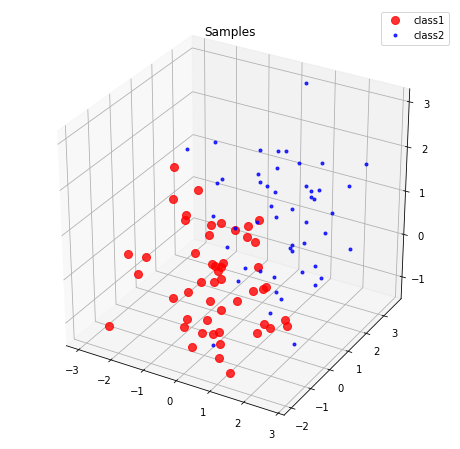

In [4]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sample1[0,:], sample1[1,:], sample1[2,:], 'o', markersize=8, color='red', alpha=0.8, label="class1")
ax.plot(sample2[0,:], sample2[1,:], sample2[2,:], 'o', markersize=3, color='blue', alpha=0.8, label="class2")
plt.title('Samples')
plt.legend()
plt.show()

Lets merge these two class samples into one and use it going forward. 

In [5]:
final_samples = np.concatenate((sample1, sample2), axis=1)
assert final_samples.shape == (3,100), "The matrix has not the dimensions 3x100"
print("****************")
print("All Samples")
print(final_samples)
print("****************")

****************
All Samples
[[-1.74976547e+00 -2.52436037e-01  2.21179669e-01  2.55001444e-01
  -5.83595050e-01 -1.04411143e-01 -4.38135623e-01  1.54160517e+00
   1.84518691e-01  1.36155613e+00  2.22399609e-01  8.16454011e-01
   1.18962227e+00 -1.23243451e+00  7.31456323e-03 -1.73309562e+00
  -1.61357850e+00 -5.49746194e-01  1.08863468e-01  1.24946974e+00
  -8.81798389e-01  1.35485486e-02  6.13038882e-01 -1.43219061e+00
  -3.31777135e-01 -5.50714412e-01  5.80573336e-01  6.86890066e-01
   7.78822399e-01  2.82836348e-02 -1.70595201e+00 -3.76903350e-01
  -7.60234657e-02 -2.48715154e+00 -2.97331547e+00 -4.50176435e-01
   3.17367976e-01  9.51394436e-02 -3.65461993e-01  6.93390659e-01
  -1.54061602e+00 -1.09717198e+00  9.49004777e-01  7.59693120e-01
   1.29626259e+00 -1.57265167e-01  7.47055655e-01 -6.40759923e-01
   2.07479317e+00  7.63183646e-01 -8.56306033e-02 -5.06294714e-01
  -1.42667924e+00  1.33259598e-01  2.49138963e+00  5.65648724e-01
   2.00405390e+00  2.49073203e+00 -2.53880668e-

### Step 2 :- Compute mean vector for each dimension

In [6]:
mean_d0 = np.mean(final_samples[0,:])
mean_d1 = np.mean(final_samples[1,:])
mean_d2 = np.mean(final_samples[2,:])

mean_vector = np.array([[mean_d0],[mean_d1],[mean_d2]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.45159604]
 [0.47553151]
 [0.41414321]]


### Step 3 : Computation of matrix

We will try to different types of matrices i.e. covariance matrix and scatter matrix for further calculations. 

### Step 3a :- Compute the covariance matrix

In mathematics and statistics, covariance is a measure of the relationship between two random variables. The metric evaluates how much – to what extent – the variables change together. In other words, it is essentially a measure of the variance between two variables. 

Unlike the correlation coefficient, covariance is measured in units. The units are computed by multiplying the units of the two variables. The variance can take any positive or negative values. The values are interpreted as follows:

- Positive covariance: Indicates that two variables tend to move in the same direction.
- Negative covariance: Reveals that two variables tend to move in inverse directions.

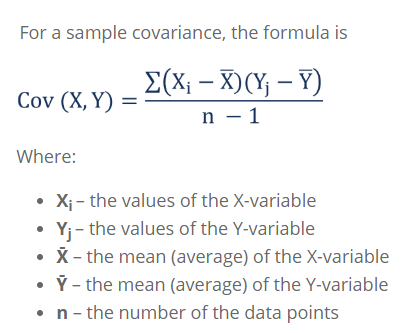

In [7]:
cm = np.cov([final_samples[0,:],final_samples[1,:],final_samples[2,:]])
print('Covariance Matrix:\n', cm)

Covariance Matrix:
 [[1.36204376 0.33044265 0.17023027]
 [0.33044265 1.76134421 0.42535293]
 [0.17023027 0.42535293 1.3275048 ]]


### Step 3b :- Compute the scatter matrix

A scatter matrix is a estimation of covariance matrix when covariance cannot be calculated or costly to calculate. The scatter matrix is also used in lot of dimensionality reduction exercises. If there are k variables , scatter matrix will have k rows and k columns i.e k X k matrix.

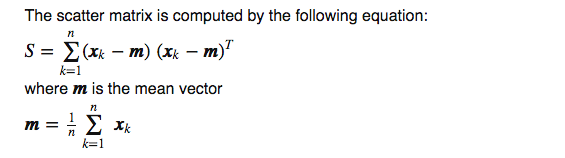

In [8]:
sm = np.zeros((3,3))
for i in range(final_samples.shape[1]):
    sm += (final_samples[:,i].reshape(3,1) - mean_vector).dot((final_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', sm)

Scatter Matrix:
 [[134.84233267  32.71382197  16.85279682]
 [ 32.71382197 174.37307699  42.10994055]
 [ 16.85279682  42.10994055 131.42297492]]


### Step 4 :- Computation of eigenvalues and eigenvectors

### Step 4a :- Compute eigenvalues, eigenvectors for covariance matrix 

In [9]:
# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cv, eig_vec_cv = np.linalg.eig(cm)

for i in range(len(eig_val_cv)):
    eigvec_cv = eig_vec_cv[:,i].reshape(1,3).T

    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cv[i]))
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cv))
    print("******************")

Eigenvalue 1 from covariance matrix: 2.188337432655088
Eigenvector 1: 
[[0.40958015]
 [0.78311575]
 [0.46794639]]
******************
Eigenvalue 2 from covariance matrix: 1.2004086862642658
Eigenvector 2: 
[[ 0.895891  ]
 [-0.24850336]
 [-0.36827354]]
******************
Eigenvalue 3 from covariance matrix: 1.0621466546293978
Eigenvector 3: 
[[ 0.17211456]
 [-0.57006649]
 [ 0.8033684 ]]
******************


### Step 4b :- Compute eigenvalues, eigenvectors for scatter matrix 

In [10]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sm, eig_vec_sm = np.linalg.eig(sm)

for i in range(len(eig_val_sm)):
    eigvec_sm = eig_vec_sm[:,i].reshape(1,3).T
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sm[i]))
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sm))
    print("**************************")

Eigenvalue 1 from scatter matrix: 216.64540583285364
Eigenvector 1: 
[[0.40958015]
 [0.78311575]
 [0.46794639]]
**************************
Eigenvalue 2 from scatter matrix: 118.84045994016239
Eigenvector 2: 
[[ 0.895891  ]
 [-0.24850336]
 [-0.36827354]]
**************************
Eigenvalue 3 from scatter matrix: 105.15251880831039
Eigenvector 3: 
[[ 0.17211456]
 [-0.57006649]
 [ 0.8033684 ]]
**************************


### Step 4c : - Difference between the two eigenvalues

In [11]:
for i in range(len(eig_val_sm)):
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cv[i]))    
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sm[i]))
    print('Scaling factor: ', eig_val_sm[i]/eig_val_cv[i])
    print("*********************")

Eigenvalue 1 from covariance matrix: 2.188337432655088
Eigenvalue 1 from scatter matrix: 216.64540583285364
Scaling factor:  98.99999999999997
*********************
Eigenvalue 2 from covariance matrix: 1.2004086862642658
Eigenvalue 2 from scatter matrix: 118.84045994016239
Scaling factor:  99.00000000000007
*********************
Eigenvalue 3 from covariance matrix: 1.0621466546293978
Eigenvalue 3 from scatter matrix: 105.15251880831039
Scaling factor:  99.0
*********************


Approximately the eigenvalues obtained for scatter matrix are 99 times bigger than eigenvalues obtained from covariance matrix. 

### Step 5 :- Selecting the "k" components

Sort the eigenvectors based on descending magnitude of eigenvalues and select the first k eigenvectors to form d by k dimensional matrix W where each column represents an eigenvector.

### Step 5a :- Arrange the eigenvectors in order

Lets arrange the eigenvectors based on the decresing order of eigenvalues. 

In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs_cv = [(np.abs(eig_val_cv[i]), eig_vec_cv[:,i]) for i in range(len(eig_val_cv))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs_cv.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs_cv:
    print(i[0])

2.188337432655088
1.2004086862642658
1.0621466546293978


In [13]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs_sm = [(np.abs(eig_val_sm[i]), eig_vec_sm[:,i]) for i in range(len(eig_val_sm))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs_sm.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs_sm:
    print(i[0])

216.64540583285364
118.84045994016239
105.15251880831039


### Step 5b :- Compute matrix W

In [14]:
matrix_w_cv = np.hstack((eig_pairs_cv[0][1].reshape(3,1), eig_pairs_cv[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w_cv)

Matrix W:
 [[ 0.40958015  0.895891  ]
 [ 0.78311575 -0.24850336]
 [ 0.46794639 -0.36827354]]


In [15]:
matrix_w_sm = np.hstack((eig_pairs_sm[0][1].reshape(3,1), eig_pairs_sm[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w_sm)

Matrix W:
 [[ 0.40958015  0.895891  ]
 [ 0.78311575 -0.24850336]
 [ 0.46794639 -0.36827354]]


### Step 6 :- Obtain the transformed feature space

In [16]:
transformed_cv = matrix_w_cv.T.dot(final_samples)
assert transformed_cv.shape == (2,100), "The matrix is not 2x100 dimensional."

In [17]:
transformed_sm = matrix_w_sm.T.dot(final_samples)
assert transformed_sm.shape == (2,100), "The matrix is not 2x100 dimensional."

In [18]:
transformed_cv

array([[ 9.12481622e-02,  9.05721827e-01, -8.36050876e-01,
        -5.06114357e-02,  7.15454134e-01,  2.30409277e-02,
        -2.97627666e-01,  3.99455908e-02,  1.15148800e+00,
         3.28237584e-01, -1.39304783e+00,  7.08729749e-01,
        -1.47142504e+00, -1.24380814e+00,  1.31206338e-01,
        -1.31259273e+00, -6.50790681e-02, -1.34875804e+00,
         3.87858317e-02,  3.30665464e-02, -2.35272127e-01,
        -1.76389386e+00,  1.30816663e+00, -1.85714840e+00,
         2.76460477e-01, -2.49472210e-01, -3.04238271e-01,
        -5.22081777e-01,  7.05292353e-01, -1.00298206e+00,
         4.68509795e-01,  1.28165787e+00, -1.14615133e-01,
        -2.88533634e+00, -1.30818626e+00, -7.02821058e-02,
        -1.06588164e+00, -8.47827468e-01, -4.02801179e-01,
        -1.31248500e+00,  3.18087413e-01, -1.30504636e+00,
         7.92126726e-01, -1.42040783e+00,  7.07055789e-01,
        -1.19454239e+00, -1.96986742e-02,  1.43077995e-01,
         2.92402780e-01,  3.00601263e-01,  2.12944524e+0

Lets look at it visually.

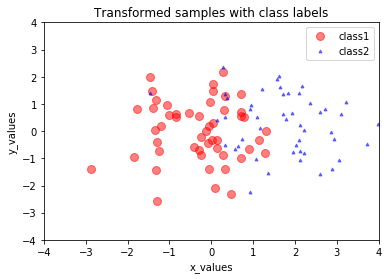

In [19]:
plt.plot(transformed_cv[0,0:50], transformed_cv[1,0:50], 'o', markersize=8, color='red', alpha=0.5, label='class1')
plt.plot(transformed_cv[0,50:100], transformed_cv[1,50:100], '^', markersize=3, color='blue', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

In [ ]:
plt.plot(transformed_sm[0,0:50], transformed_sm[1,0:50], 'o', markersize=8, color='red', alpha=0.5, label='class1')
plt.plot(transformed_sm[0,50:100], transformed_sm[1,50:100], '^', markersize=3, color='blue', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

# 3. Approach 2 - Using the matplotlib.mlab libraries PCA class

Now, that we have seen how a principal component analysis works, we can use the in-built PCA() class from the matplotlib library. Documentation can be found here :
https://www.clear.rice.edu/comp130/12spring/pca/pca_docs.shtml

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The PCA class was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  This is separate from the ipykernel package so we can avoid doing imports until


PC axes in terms of the measurement axes scaled by the standard deviations:
 [[ 0.50275501  0.6417567   0.57912498]
 [-0.81246479  0.12203047  0.57009607]
 [ 0.29519208 -0.7571373   0.58275616]]


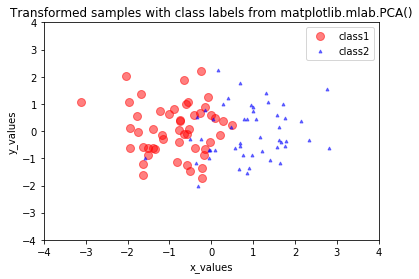

In [20]:
from matplotlib.mlab import PCA as mlabPCA

mlab_pca = mlabPCA(final_samples.T)

print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:50,0],mlab_pca.Y[0:50,1], 'o', markersize=8, color='red', alpha=0.5, label='class1')
plt.plot(mlab_pca.Y[50:100,0], mlab_pca.Y[50:100,1], '^', markersize=3, color='blue', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

# 4. Approach 3 - Using the sklearn.decomposition libraries PCA class

Lets use another library that doesn’t rescale the input data by default.
Here, we will use the PCA class from the scikit-learn machine-learning library. The documentation can be found here:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.

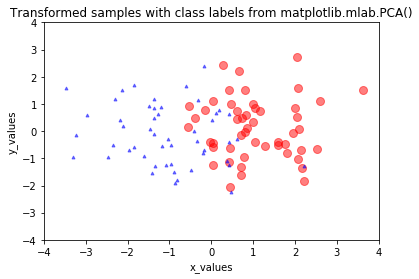

In [24]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(final_samples.T)

plt.plot(sklearn_transf[0:50,0],sklearn_transf[0:50,1], 'o', markersize=8, color='red', alpha=0.5)
plt.plot(sklearn_transf[50:100,0], sklearn_transf[50:100,1], '^', markersize=3, color='blue', alpha=0.5)

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()


The plot above seems to be the exact mirror image of the plot from out step by step approach. This is due to the fact that the signs of the eigenvectors can be either positive or negative, since the eigenvectors are scaled to the unit length 1, both we can simply multiply the transformed data by ×(−1) to revert the mirror image.

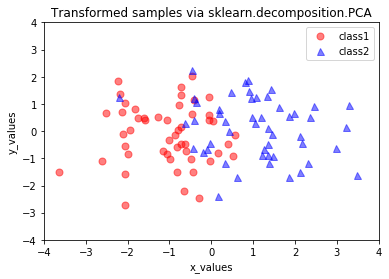

In [25]:
sklearn_transf = sklearn_transf * (-1)

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:50,0],sklearn_transf[0:50,1], 'o', markersize=7, color='red', alpha=0.5, label='class1')
plt.plot(sklearn_transf[50:100,0], sklearn_transf[50:100,1], '^', markersize=7, color='blue', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

# 5. Using Scree Plot to decide upon number of principal components

In [30]:
sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(final_samples.T)

In [31]:
var= sklearn_pca.explained_variance_ratio_
var

array([0.49166258, 0.26970065])

In [32]:
var1=np.cumsum(np.round(sklearn_pca.explained_variance_ratio_, decimals=4)*100)
var1

array([49.17, 76.14])

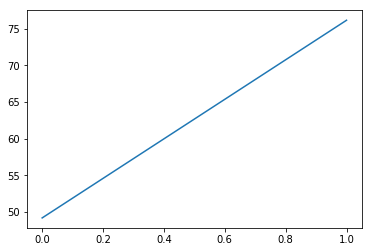

In [33]:
plt.plot(var1)

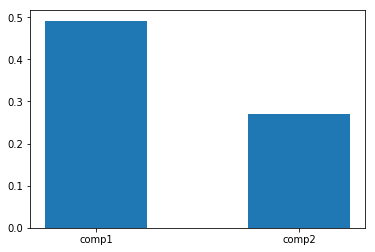

In [35]:
figure, ax = plt.subplots()

index = np.arange(2)
bar_width=0.5

labels = ["comp1", "comp2"]

ax.bar(labels, var, bar_width)
plt.show()

### References :-

- 1) Introduction to Data Mining by Tan, Kumar et al.
- 2) <a src="http://sebastianraschka.com/Articles/2014_pca_step_by_step.html"> Step by step PCA<a>